### Problem Statement

In this assignment, I have predicted that a person makes over 50K per year or not from a classic adult dataset using XGBoost.

In [2]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the Dataset

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows=1, header=None)

#### Adding Column_names to dataset

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status',
             'occupation','relationship','race','sex','capital_gain','capital_loss','hour_per_week',
             'native_coounty','wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [5]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_coounty,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Joining train & test Datasets so that preprocessing steps will be easier when combined

In [6]:
df = pd.concat([train_set,test_set])

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hour_per_week,native_coounty,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hour_per_week   48842 non-null  int64 
 13  native_coounty  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


#### Data Shape

In [9]:
df.shape

(48842, 15)

#### Data Desctiption

In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hour_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Data sixe

In [11]:
df.size

732630

#### Checking for null values in dataset

In [12]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hour_per_week     0
native_coounty    0
wage_class        0
dtype: int64

#### Replacing "?" with nan values

In [13]:
df.replace('?', np.nan,inplace=True)

In [14]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hour_per_week     0
native_coounty    0
wage_class        0
dtype: int64

#### Checking for Data Types

In [15]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hour_per_week      int64
native_coounty    object
wage_class        object
dtype: object

#### Feature Engineering

##### Workclass

In [16]:
df.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [17]:
df = df.replace({' <=50K':0,' >50K':1,' <=50K.':0,' >50K.':1})

In [18]:
df.head()x

SyntaxError: invalid syntax (<ipython-input-18-d336a019874f>, line 1)

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['wage_class'])

In [ ]:
df.workclass.unique()

In [ ]:
df = df.replace('without-pay', 'never-worke')

In [ ]:
df['workclass'].unique()

In [ ]:
df['workclass'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [ ]:
df['workclass'].fillna('0',inplace=True)

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

#### Fnlgwt

In [ ]:
df['fnlwgt'].describe()

In [ ]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x:np.log1p(x))

In [ ]:
df['fnlwgt'].describe()

#### Education

In [ ]:
df['education'].value_counts()

In [ ]:
df.columns

In [ ]:
sns.catplot(x='education', y='wage_class', data=df, height=10, palette='muted',kind='bar')
plt.xticks(rotation=60)

In [ ]:
def primary(x):
    if x  in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th','11th','12th']:
        return 'primary'
    else:
        return x

In [ ]:
df['education'] = df['education'].apply(primary)

In [ ]:
sns.catplot(x='education', y='wage_class', data=df, height=10, palette='muted',kind='bar')
plt.xticks(rotation=60)

#### Marital_Status

In [ ]:
df['marital_status'].value_counts()

In [ ]:
df['marital_status'].replace('Married-AF-spouse', 'Married-civ-spouse', inplace=True)

In [ ]:
sns.catplot(x='marital_status',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Occupation

In [ ]:
df['occupation'].fillna('0',inplace=True)

In [ ]:
df['occupation'].value_counts()

In [ ]:
sns.catplot(x='occupation', y='wage_class', data=df, palette='muted', kind='bar', height=8)
plt.xticks(rotation=8)

#### Relationship

In [ ]:
df['relationship'].value_counts()

#### Race 

In [ ]:
df['race'].value_counts()

In [ ]:
df.columns

#### Sex

In [ ]:
df['sex'].value_countsnts()

#### Native_Country

In [ ]:
df['native_coounty'].unique()

In [ ]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [ ]:
df['native_coounty'] = df['native_coounty'].apply(native)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

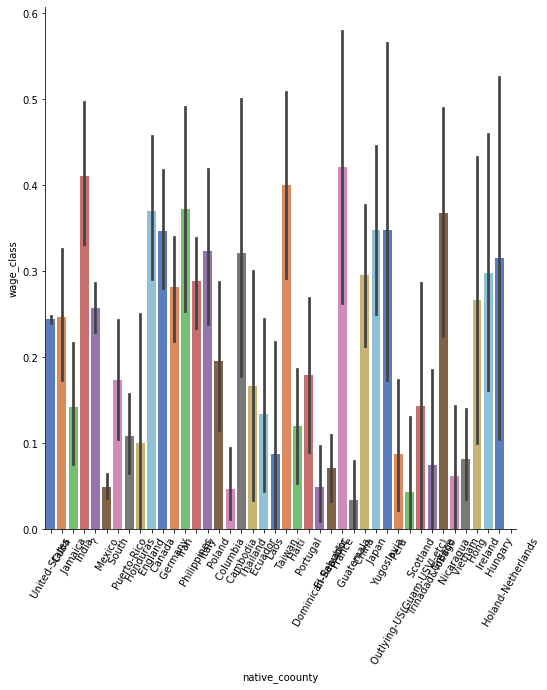

In [19]:
sns.catplot(x='native_coounty',y='wage_class',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Checking Correlation using Heatmap

<AxesSubplot:>

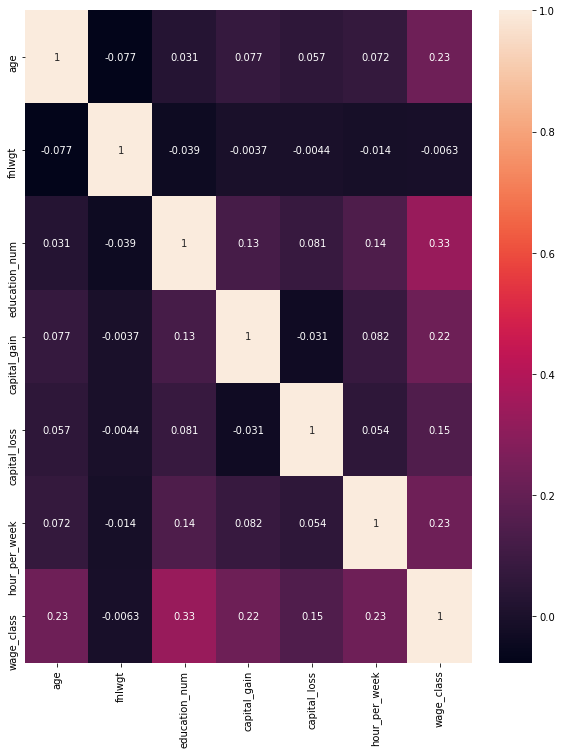

In [21]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

#### Splitting Data into X and y

In [23]:
X = df.drop(['wage_class'], axis=1)
y = df['wage_class']

In [24]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hour_per_week', 'native_coounty'],
      dtype='object')

#### Coverting categorical values inX to numerical values

In [25]:
X_d = pd.get_dummies(X)

In [26]:
X_d.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hour_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_coounty_ Portugal,native_coounty_ Puerto-Rico,native_coounty_ Scotland,native_coounty_ South,native_coounty_ Taiwan,native_coounty_ Thailand,native_coounty_ Trinadad&Tobago,native_coounty_ United-States,native_coounty_ Vietnam,native_coounty_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Scaling X values using Standard Scaler

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_d)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=101)

In [29]:
x_train.shape

(34189, 108)

In [30]:
y_train.shape

(34189,)

#### Setting parameters for GridSearchCV

In [31]:
params = [{'learning_rate' : [0.01,0.001],
                        'max_depth':[3,5,10],
                        'n_estimators':[10,50,100,200]
          }
         ]

#### Applying GridSeaarchCV

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Xbc = XGBClassifier()
Gcv = GridSearchCV(Xbc,params,scoring='accuracy',cv=5,n_jobs=3,verbose=3)
Gcv.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   57.0s
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  9.1min finished
C:\Users\Neelakanta S Shiroor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:04:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
  

#### Getting best params for XGboost from GSV

In [34]:
Gcv.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

#### Applying best params on XGBoost

In [36]:
XBC = XGBClassifier(learning_rate=0.01,max_depth=10,n_estimators=200)
XBC.fit(x_train,y_train)

C:\Users\Neelakanta S Shiroor\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:07:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

#### Evaluating Model

In [37]:
XBC.score(x_test,y_test)

0.866034259196069

In [38]:
y_pred = XBC.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [40]:
print(f'Accuracy Score{accuracy_score(y_test,y_pred)}')
print('*'*50)
print(f'Cofusion Matrix: {confusion_matrix(y_test,y_pred)}')
print('*'*50)
print(f'Classification Report : {classification_report(y_test,y_pred)}')

Accuracy Score0.866034259196069
**************************************************
Cofusion Matrix: [[10534   566]
 [ 1397  2156]]
**************************************************
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.95      0.91     11100
           1       0.79      0.61      0.69      3553

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653

